# Pymaceuticals Inc.

# Analysis: Leveraging the stength of data visualization in conjuction with comprehensive data analysis is instrumental in narrating a compelling sotry and offering deeper insights. In the following script, Matplotlib is employed to systematically analyze pharmaceutical data pertaining to potential treatments for a specific form of skin cancer. 

The created tables and plots include:
- data preparation
    - merging data sets into a single data frame
    - displaying the number of unique mice IDs, identifying any duplicate time points, and creating a cleaned DataFrame without duplicates
- Generate Summary Statistics
    - Create a DataFrame with summary statistics for each drug regimen, including mean, median, variance, standard deviation, and SEM of the tumor volume
    - Create the same DataFrame in one line using the aggregation method
- Create Bar Charts and Pie Charts
    - Generate two identical bar charts depicting the total number of Observated Mouse Timpoints for each drug regiment using both Pandas and Matplotlib
    - Create two identical pie charts showing the distribution of female versus male mice in the study using both Pandas and Matplotlib
- Calculate Quartiles, Find Outliers, and Create a Box Plot
    - Calculate final tumor volume for mice on Capomulin, Ramican, Infubinol, and Ceftamin
    - Determine quartiles, IQR, and identify potential outliers for each treatment
    - Generate a box plot using Matplotlib, highlighting any potential outliers
- Create a Line Plot and a Scatter Plot
    - Generate a line plot of tumor volume versus time point for a mouse treated with Capomulin
    - Create a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen
- Calculate Correlation and Regression:
    - Calculate the correlation coefficient and linear regression model between mouse weight and average ovserved tumor volume for Capomulin

The script below highlights the following syntaxs: matplotlib, pandas plotting, merge(), groupby(), sort_values(), agg(), linregress(), subplot(), IQR, outliers, and more

Conclusions:
- Effectiveness of Drug Regimens:
    - The summary statistics tables and box plots highlight the effectiveness of drug regimens. Capomulin and Ramicane displayed lower mean and median tumor volumes compared to Infubinol and Ceftamin. This suggests that Capomulin and Ramicane may have higher success in reducing tumor sizes over the couse of the study.
- Mouse Weight Impact on Treatment:
    - The correlatin and regression analysis between mouse weight and average tumor volume for the Capomulin treatment regimen revealed a direct positive correlation. As mouse weight increase, the average tumor volume tends to increase as well. This analysis is critical for understanding the potential impact of weight on the effectiveness of the treatment, enabling researchers to consider weight-related factors in future studies.
- Gender Distibution Across Study
    - The pie charts display a relatively even distribution of male and female mice across all drug regimen treatments. This balance is important for ensuring that any observed effects or outcomes are not biased by gender differences. Further investigation could be administered regarding how each gender responds to different drug regimens. 

Resources: https://matplotlib.org/stable/gallery/index.html, Northwestern Data Visualization Class Lectures or In-Class activities, ChatGPT, Data generated by MockarooLinks

 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_data_combined = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="right")
# change the order of the columns to match the reference image
desired_order = ['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']
mouse_data_combined = mouse_data_combined[desired_order]

# Display the data table for preview

mouse_data_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
mice_number = mouse_data_combined["Mouse ID"].nunique()
mice_number


249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_data_combined_copy = mouse_data_combined
duplicates_check = mouse_data_combined_copy[mouse_data_combined_copy.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates_check = duplicates_check["Mouse ID"].unique()
duplicates_check



array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates_data = mouse_data_combined_copy[mouse_data_combined_copy.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates_data.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# copy original data set
cleaned_mouse_data = mouse_data_combined

# convert the array above to a string so we can drop the value
drop_value = str(duplicates_check)
cleaned_mouse_data = cleaned_mouse_data[cleaned_mouse_data['Mouse ID'] !=drop_value]

cleaned_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.

mice_total = cleaned_mouse_data['Mouse ID'].nunique()
mice_total


249

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_sumtable = cleaned_mouse_data.groupby(['Drug Regimen'])
dr_tumorvol_mean = drug_regimen_sumtable['Tumor Volume (mm3)'].mean()
dr_tumorvol_median = drug_regimen_sumtable['Tumor Volume (mm3)'].median()
dr_tumorvol_variance = drug_regimen_sumtable['Tumor Volume (mm3)'].var()
dr_tumorvol_std = drug_regimen_sumtable['Tumor Volume (mm3)'].std()
dr_tumorvol_sem = drug_regimen_sumtable['Tumor Volume (mm3)'].sem()
dr_tumorvol_sem

# Assemble the resulting series into a single summary DataFrame.
sumtable_perdrug = {"Mean Tumor Volume": dr_tumorvol_mean, "Median Tumor Volume": dr_tumorvol_median, 
                    "Tumor Volume Variance": dr_tumorvol_variance, "Tumor Volume Std. Dev.": dr_tumorvol_std,
                    "Tumor Volume Std. Err.": dr_tumorvol_sem} 
sumtable_perdrug = pd.DataFrame(sumtable_perdrug)
sumtable_perdrug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_summary_agg = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std',"sem"])

drug_summary_agg



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

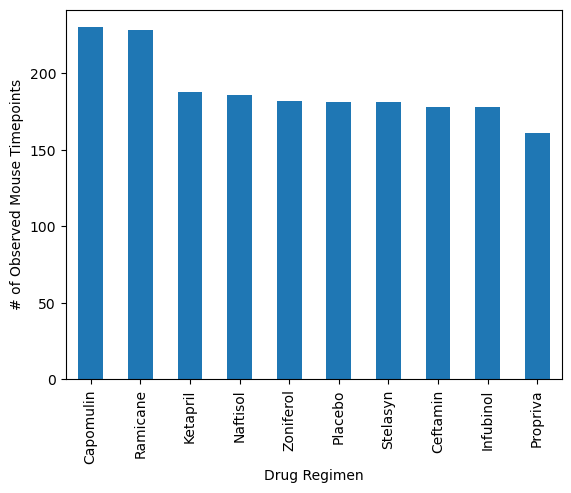

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# group the Timepoints by Drug Regimen and calc the number of values
bar_drugtimepoints = cleaned_mouse_data.groupby('Drug Regimen')['Timepoint'].count()

# sort in descending order (to match the reference chart)
bar_drugtimepoints = bar_drugtimepoints.sort_values(ascending=False)

# plot chart using pandas
bar_drugtimepoints_chart = bar_drugtimepoints.plot(kind="bar")

# label axes
bar_drugtimepoints_chart.set_ylabel('# of Observed Mouse Timepoints')




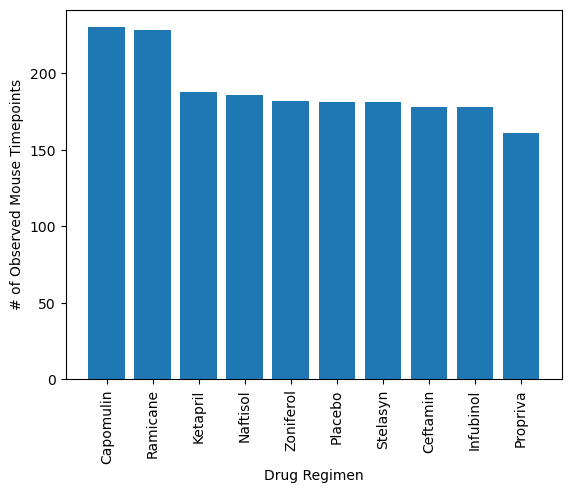

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# group the Timepoints by Drug Regimen and calc the number of values
bar_drugtimepoints = cleaned_mouse_data.groupby('Drug Regimen')['Timepoint'].count()

# sort in descending order (to match the reference chart)
bar_drugtimepoints = bar_drugtimepoints.sort_values(ascending=False)


plt.bar(bar_drugtimepoints.index, bar_drugtimepoints)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

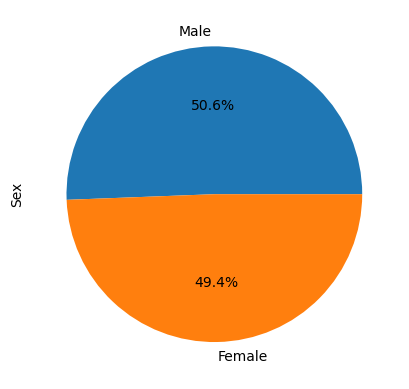

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mousegender_plot = cleaned_mouse_data['Sex'].value_counts()

mousegender_plotpie = mousegender_plot.plot(kind="pie", autopct='%1.1f%%', ylabel="Sex")


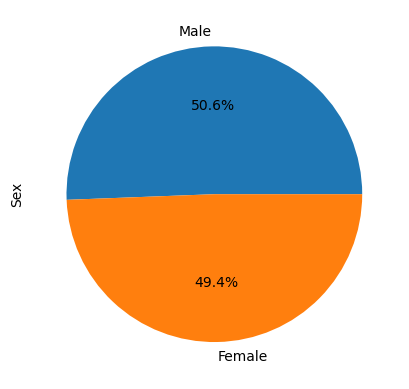

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mousegender_plot = cleaned_mouse_data['Sex'].value_counts()

plt.pie(mousegender_plot, autopct='%1.1f%%', labels=mousegender_plot.index)
plt.ylabel("Sex")

plt.show()




## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
find_greatesttimepoint = cleaned_mouse_data.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
sort_drugregimen = pd.merge(find_greatesttimepoint, cleaned_mouse_data, on=['Mouse ID', 'Timepoint'])


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list = list(cleaned_mouse_data['Drug Regimen'].unique()) #use this line if want to calc for all unique drug regiments
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
treatment_list
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and potential outliers 

for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = sort_drugregimen[sort_drugregimen['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_occupancy = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Print findings
    print(f"{treatment}'s potential outliers: {outlier_occupancy}")





Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


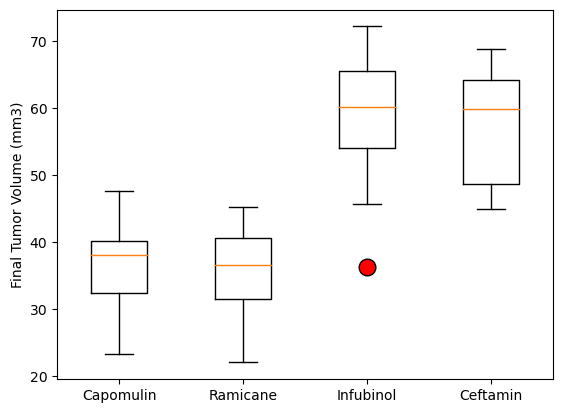

In [33]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig1,ax1 = plt.subplots()
# plot box plot
# used chat gpt for syntax regarding changing the outlier circle to red to match reference image
ax1.boxplot(tumor_vol_data, labels=treatment_list, flierprops=dict(markerfacecolor='red',markersize=12))
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()





## Line and Scatter Plots

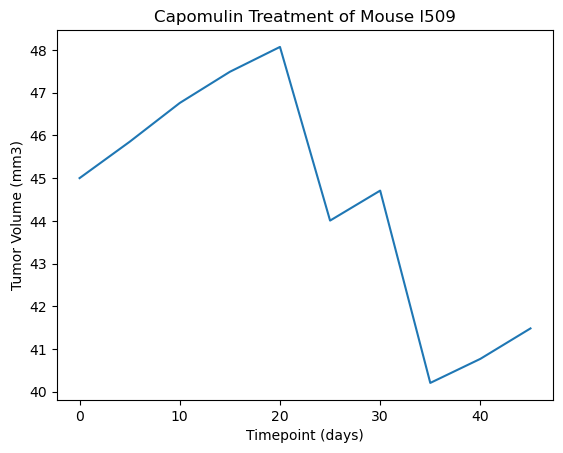

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter Data to only include only the mice treated with Capomulin
capomulin_mousetumor = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']

# Choose a Mouse ID
selected_mouseID = "l509"
single_tumordata = capomulin_mousetumor[capomulin_mousetumor['Mouse ID'] == selected_mouseID]


#create x and y values for plot
tumor_vol_singular = list(single_tumordata['Tumor Volume (mm3)'])
time_point_singular = list(single_tumordata['Timepoint'])

# create plot

plt.plot(time_point_singular,tumor_vol_singular)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


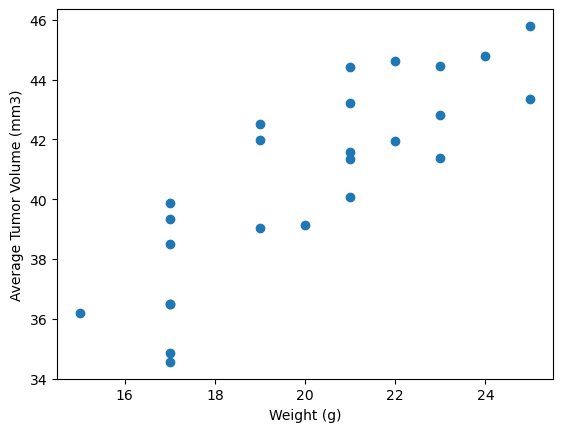

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# use data filtered to only include capolmulin data from above
capomulin_mousetumor.head()
mouse_tumorvol_cap = capomulin_mousetumor.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight_cap = capomulin_mousetumor.groupby('Mouse ID')['Weight (g)'].mean()

# plot scatter plot
plt.scatter(mouse_weight_cap,mouse_tumorvol_cap)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the aveerage tumor volume is 0.84


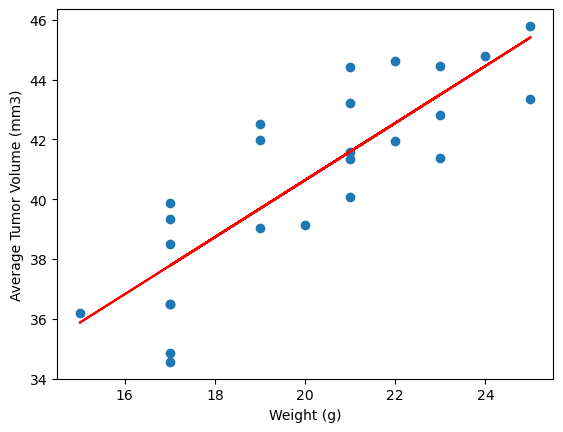

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate linear regression model 
c_slope, c_int, c_r, c_p, d_std_err = st.linregress(mouse_weight_cap,mouse_tumorvol_cap)
c_fit = c_slope * mouse_weight_cap + c_int

# calc correlation coefficient
correlation_coefficient = st.pearsonr(mouse_weight_cap, mouse_tumorvol_cap)
print(f"The correlation between mouse weight and the aveerage tumor volume is {round(correlation_coefficient[0],2)}")

# again using the filtered capomulin data frame from above
# plot
plt.scatter(mouse_weight_cap,mouse_tumorvol_cap)
plt.plot(mouse_weight_cap, c_fit, "-", color= 'red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()